In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
karate = nx.karate_club_graph()

In [3]:
def nx_to_plotly(graph, coloring, positions=None, edge_color="red", node_color="blue"):

    if not positions:
        positions = nx.spring_layout(graph)
    else:
        assert isinstance(positions, dict), "positions needs to be a dict with the node positions"
    
    edge_x = []
    edge_y = []

    for edge in graph.edges():
        x0, y0 = positions[edge[0]]
        x1, y1 = positions[edge[1]]
        
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color=edge_color),
        hoverinfo='none',
        mode='lines',
    )

    ecc = nx.eccentricity(graph)
    ecc_ = []
    colors = []

    node_x = []
    node_y = []
    for node in graph.nodes(data=True):
        print(node)
        x, y = positions[node[0]]
        node_x.append(x)
        node_y.append(y)
        ecc_.append(ecc[node[0]]*5)
        colors.append(node[1][coloring])


    _, bins = np.unique(colors, return_inverse=True)

    node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    marker = dict(
        size = ecc_,
        # color=np.random.randint(1,5, len(graph.nodes()))
        color=bins
        )
    )

    graph_fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                titlefont_size=16,
                paper_bgcolor="white",
                plot_bgcolor="white",
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)),
                
                )


    return graph_fig

In [4]:
karate_df = pd.DataFrame(karate.nodes(data="club"), columns=["person", "club"])

In [ ]:
np.unique(karate_df.club, return_inverse=True)[1]

In [ ]:
nx_to_plotly(karate, "club", edge_color="black")

In [127]:
karate_df.club.unique()

array(['Mr. Hi', 'Officer'], dtype=object)

In [131]:
hi_nodes = list(karate_df.loc[karate_df.club == "Mr. Hi", "person"])
officer_nodes = list(karate_df.loc[karate_df.club == "Officer", "person"])

In [ ]:
nx.draw(karate)

In [ ]:
nx.eccentricity(karate)

In [ ]:
nx.periphery(karate)

In [ ]:
# ratio of the number of triangles and the number of open triads
nx.transitivity(G) # puts large weight on high degree nodes


In [ ]:
nx.average_clustering(G)

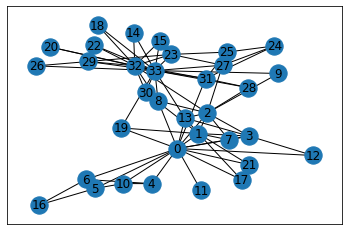

In [134]:
nx.draw_networkx(karate, with_labels=True)

In [135]:
cent_subset = nx.betweenness_centrality_subset(karate, hi_nodes, officer_nodes, normalized=True) # betweenness centrality can be limited to a subset of the nodes
# to see what nodes are key in the connection of those subsets

In [ ]:
cent_subset

## LastFm social Network

In [98]:
lastfm = nx.read_edgelist("Data/lasftm_asia/lastfm_asia_edges.csv", delimiter=",")

In [99]:
nx.transitivity(lastfm)

0.178622548153384

In [100]:
nx.average_clustering(lastfm)

0.2194184243270858

In [42]:
def plot_clustering(graph):
    x = np.array(list(nx.clustering(G).values()))
    return sns.ecdfplot(x)

In [104]:
nx.average_clustering(lastfm)

0.2194184243270858

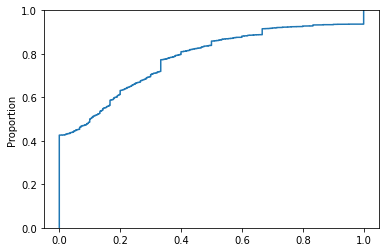

In [118]:
fig = plot_clustering(lastfm)

<AxesSubplot:ylabel='Proportion'>

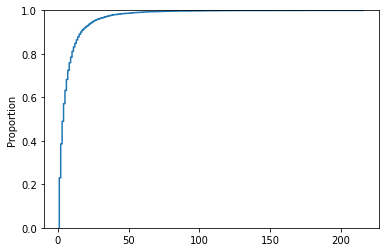

In [160]:
fig, ax = plt.subplots()

sns.ecdfplot(np.array(list(dict(nx.degree(lastfm)).values())), ax=ax)

In [103]:
nx.number_connected_components(lastfm)

1

In [107]:
nx.minimum_edge_cut(karate)

{(11, 0)}

In [105]:
nx.node_connectivity(karate)

1

In [106]:
nx.edge_connectivity(karate)

1

In [ ]:
nx.average_shortest_path_length(G)

In [ ]:
nx.eccentricity(G)

In [ ]:
nx.diameter(G)

In [ ]:
nx.betweenness_centrality(lastfm, k=10)

In [138]:
target=pd.read_csv("Data/lasftm_asia/lastfm_asia_target.csv")

In [152]:
nx.set_node_attributes(lastfm, {str(i["id"]):i["target"] for i in target.to_dict("records")}, name="target")

In [ ]:
lastfm.nodes(data=True)

In [156]:
lastfm_df = pd.DataFrame(lastfm.nodes(data="target"), columns=["person", "target"])

In [ ]:
lastfm_df